In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("thyroid_dataset.csv")

In [3]:
df.head()

,Age,Sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3_measured,TT4_measured,T4U_measured,FTI_measured,Outlier_label
0,0.45,1,0,0,0,0,0,0,0,0,...,0,0,0,0,61.0,6.0,23.0,87.0,26.0,o
1,0.61,0,0,0,0,1,0,0,0,0,...,0,0,0,0,29.0,15.0,61.0,96.0,64.0,o
2,0.16,0,1,0,0,0,0,0,0,0,...,0,1,0,0,29.0,19.0,58.0,103.0,56.0,o
3,0.85,0,0,0,0,0,0,0,0,0,...,0,0,0,0,114.0,3.0,24.0,61.0,39.0,o
4,0.75,1,0,0,0,0,0,0,0,0,...,0,0,0,0,49.0,3.0,5.0,116.0,4.0,o


In [4]:
X = df.drop("Outlier_label", axis=1)
y = df["Outlier_label"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
#IsolationForest

from sklearn.ensemble import IsolationForest

clf = IsolationForest(n_estimators=200, contamination=0.036, random_state=42)

In [16]:
labels = clf.fit_predict(X_scaled)

In [17]:
labels

array([ 1,  1, -1, ...,  1,  1,  1])

In [18]:
#Visualize data --> Dimention reduction using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


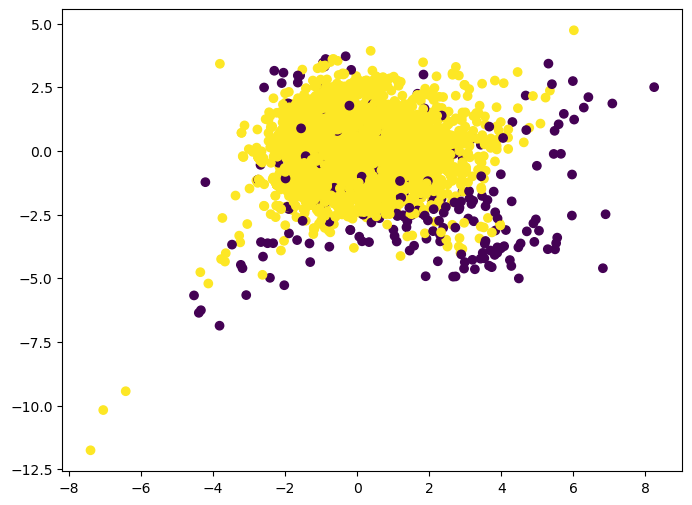

In [19]:
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

In [20]:
import numpy as np

n_outliers = np.sum(labels== -1)
n_normal = np.sum(labels==1)

print("Outlier = ", n_outliers)
print("Normal = ", n_normal)

Outlier =  249
Normal =  6667


# Local Outlier Factor - LOF

In [21]:
from sklearn.neighbors import LocalOutlierFactor

In [25]:
neighbs = LocalOutlierFactor(contamination=0.036)

labels = neighbs.fit_predict(X_scaled)

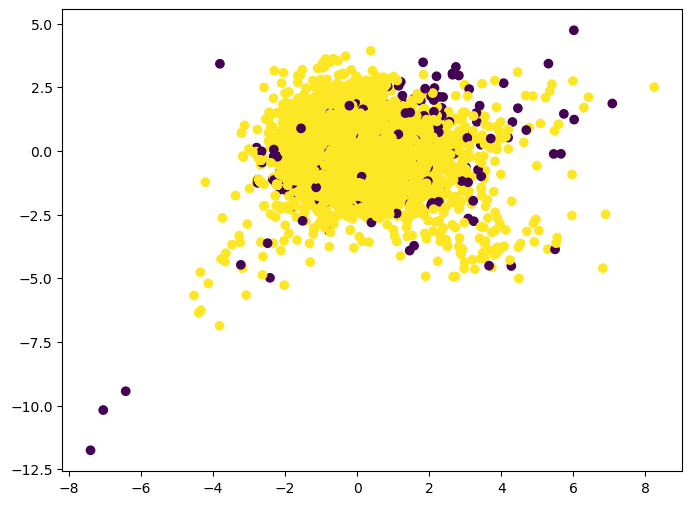

In [26]:
plt.figure(figsize=(8,6))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

In [27]:
n_outliers = np.sum(labels== -1)
n_normal = np.sum(labels==1)

print("Outlier = ", n_outliers)
print("Normal = ", n_normal)

Outlier =  249
Normal =  6667
